<a id="import"></a>
# <p style="background-color:royalblue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 1 | Import Libraries</p>

In [7]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import  confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

<a id="import"></a>
# <p style="background-color:royalblue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 2 | Data Understanding & Loading
</p>

In [8]:
df = pd.read_csv("C:/Users/hassa/OneDrive/Desktop/New folder/first inten project.csv")

def analyze_dataframe(df):

    print("DataFrame Information:")
    print("----------------------")
    display(df.info(verbose=True, show_counts=True))
    print("\n")

    print("DataFrame Values (head(5).T):")
    print("----------------------")
    display(df.head(5).T)
    print("\n")

    print("DataFrame Description:")
    print("----------------------")
    display(df.describe(include="all").T)
    print("\n")

    print("Number of Null Values:")
    print("----------------------")
    display(df.isnull().sum())
    print("\n")

    print("Number of Duplicated Rows:")
    print("--------------------------")
    display(df.duplicated().sum())
    print("\n")

    print("Number of Unique Values:")
    print("------------------------")
    display(df.nunique())
    print("\n")


    print("DataFrame Shape:")
    print("----------------")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

analyze_dataframe(df)

DataFrame Information:
----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price  

None



DataFrame Values (head(5).T):
----------------------


,0,1,2,3,4
Booking_ID,INN00001,INN00002,INN00003,INN00004,INN00005
number of adults,1,1,2,1,1
number of children,1,0,1,0,0
number of weekend nights,2,1,1,0,1
number of week nights,5,3,3,2,2
type of meal,Meal Plan 1,Not Selected,Meal Plan 1,Meal Plan 1,Not Selected
car parking space,0,0,0,0,0
room type,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1
lead time,224,5,1,211,48
market segment type,Offline,Online,Online,Online,Online




DataFrame Description:
----------------------


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Booking_ID,36285,36285,INN36286,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number of adults,36285.0,NaN,NaN,NaN,1.844839,0.518813,0.0,2.0,2.0,2.0,4.0
number of children,36285.0,NaN,NaN,NaN,0.10536,0.402704,0.0,0.0,0.0,0.0,10.0
number of weekend nights,36285.0,NaN,NaN,NaN,0.810693,0.87059,0.0,0.0,1.0,2.0,7.0
number of week nights,36285.0,NaN,NaN,NaN,2.204602,1.410946,0.0,1.0,2.0,3.0,17.0
type of meal,36285,4,Meal Plan 1,27842,NaN,NaN,NaN,NaN,NaN,NaN,NaN
car parking space,36285.0,NaN,NaN,NaN,0.030977,0.173258,0.0,0.0,0.0,0.0,1.0
room type,36285,7,Room_Type 1,28138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead time,36285.0,NaN,NaN,NaN,85.239851,85.938796,0.0,17.0,57.0,126.0,443.0
market segment type,36285,5,Online,23221,NaN,NaN,NaN,NaN,NaN,NaN,NaN




Number of Null Values:
----------------------


Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64



Number of Duplicated Rows:
--------------------------


np.int64(0)



Number of Unique Values:
------------------------


Booking_ID                  36285
number of adults                5
number of children              6
number of weekend nights        8
number of week nights          18
type of meal                    4
car parking space               2
room type                       7
lead time                     352
market segment type             5
repeated                        2
P-C                             9
P-not-C                        59
average price                3930
special requests                6
date of reservation           553
booking status                  2
dtype: int64



DataFrame Shape:
----------------
Rows: 36285, Columns: 17


### **💡Key Points**:

**✅ No missing values or duplicate entries in this data..**

<a id="preprocessing"></a>
# <p style="background-color:royalblue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 3 | Data Preprocessing</p>


<a id="engineering"></a>
# <b><span style='color:darkturquoise'>Step 3.1 |</span><span style='color:royalblue'> Feature Selection and Engineering</span></b>

In [9]:
# Remove any leading or trailing whitespace from column names
df.columns = df.columns.str.strip()

# Convert the "date of reservation" column to datetime format, handling errors by coercing invalid values to NaT
df['date of reservation'] = pd.to_datetime(df['date of reservation'], errors='coerce')

# Drop rows containing NaT values (missing dates)
df.dropna(inplace=True)

# Extract the year from the "date of reservation" and convert it to an integer
df["year"] = df["date of reservation"].dt.year.astype(int)

# Extract the month from the "date of reservation" and convert it to an integer
df["month"] = df["date of reservation"].dt.month.astype(int)

# Create a new column "is_weekend" (1 if the reservation was made on a weekend, 0 otherwise)
df["is_weekend"] = df["date of reservation"].dt.weekday.isin([5, 6]).astype(int)
# Add a new column "total nights" by summing the number of weekend and week nights
df['total nights'] = df['number of weekend nights'] + df['number of week nights']

# Create a new column "guest type" to classify customers as "Family" if they have children, otherwise "Individual/Couple"
df['guest type'] = df.apply(lambda x: 'Family' if x['number of children'] > 0 else 'Individual/Couple', axis=1)

# Drop unnecessary columns
df.drop(columns=["date of reservation", 'P-C', 'P-not-C',
                 'Booking_ID','number of adults','number of children',
                 'number of weekend nights','number of week nights'],
        inplace=True)

# Select all numerical columns (both float and integer types)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
# Display the first few rows of the modified dataframe
df.head()


,type of meal,car parking space,room type,lead time,market segment type,repeated,average price,special requests,booking status,year,month,is_weekend,total nights,guest type
0,Meal Plan 1,0,Room_Type 1,224,Offline,0,88.00,0,Not_Canceled,2015,10,0,7,Family
1,Not Selected,0,Room_Type 1,5,Online,0,106.68,1,Not_Canceled,2018,11,0,4,Individual/Couple
2,Meal Plan 1,0,Room_Type 1,1,Online,0,50.00,0,Canceled,2018,2,0,4,Family
3,Meal Plan 1,0,Room_Type 1,211,Online,0,100.00,1,Canceled,2017,5,1,2,Individual/Couple
4,Not Selected,0,Room_Type 1,48,Online,0,77.00,0,Canceled,2018,4,0,3,Individual/Couple


### **💡Key Points**:

**✅ Cleans column names by stripping whitespace.**

**✅ Handles datetime conversion and extracts relevant features (year, month, weekend indicator).**

**✅ Creates new features:"total nights" (total stay duration)."guest type" (categorizes guests as family or individual/couple).**

**✅ Removes unnecessary columns to reduce redundancy and improve model performance.**

**✅ Identifies numerical columns for further analysis.**


<a id="engineering"></a>
# <b><span style='color:darkturquoise'>Step 3.2 |</span><span style='color:royalblue'> Handling Skewness Using Log Transformation Instead of Removing Outliers</span></b>  

#### **🔹 Why Did We Use This Instead of Removing Outliers?**  
1️⃣ **Preserves Important Data:** Removing outliers in this data may lead to data loss, especially if they hold valuable information.

2️⃣ **Reduces the Impact of Extreme Values:** Log transformation **compresses large values**, making distributions more symmetric.

3️⃣ **Handles Right-Skewed Data More Effectively:** Instead of removing extreme values, we adjust the scale to bring them closer to the mean. 

In [10]:
# Calculate the skewness of numerical columns
skewness = df[numerical_cols].skew()

# Identify columns where skewness is greater than 1 or less than -1 (highly skewed)
skewed_cols = skewness[abs(skewness) > 1].index

# Apply log transformation (log1p = log(1 + x)) to reduce skewness
df[skewed_cols] = np.log1p(df[skewed_cols])

# Print the skewness after transformation to check improvement
print("\n", df[skewed_cols].skew())



 car parking space    5.419387
lead time           -0.826554
repeated             6.014476
special requests     0.565615
year                -1.675565
total nights         0.136667
dtype: float64


###   📌 Key Points:
**✅ Detects skewed numerical columns by calculating skewness.**

**✅ Applies log transformation (log1p) to reduce skewness.**

**✅ Uses log1p(x) = log(1 + x) to avoid issues with zero values.**

**✅ Rechecks skewness after transformation to ensure effectiveness.**

## <a id="encode"></a>
# <b><span style='color:darkturquoise'>Step 3.3 |</span><span style='color:royalblue'> Encode Categorical Variables</span></b>

In [11]:
# Apply Label Encoding for binary categorical columns
df["booking status"] = LabelEncoder().fit_transform(df["booking status"])  # Converts 'Canceled' & 'Not Canceled' to 0 & 1
df["guest type"] = LabelEncoder().fit_transform(df["guest type"])  # Converts 'Family' & 'Individual/Couple' to numerical labels

# Apply Target Encoding for "market segment type" (Encoding based on its relationship with the target)
target_encoder = ce.TargetEncoder(cols=["market segment type"])
df["market segment type_encoded"] = target_encoder.fit_transform(df["market segment type"], df["booking status"])

# Drop the original "market segment type" column since it has been encoded
df.drop(columns=["market segment type"], inplace=True)

# Apply One-Hot Encoding for nominal categorical columns ('room type' & 'type of meal')
df_dummies = pd.get_dummies(df, columns=['room type', 'type of meal'])

# Display the first few rows of the transformed dataframe
df_dummies.head()

,car parking space,lead time,repeated,average price,special requests,booking status,year,month,is_weekend,total nights,...,room type_Room_Type 2,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7,type of meal_Meal Plan 1,type of meal_Meal Plan 2,type of meal_Meal Plan 3,type of meal_Not Selected
0,0.0,5.416100,0.0,88.00,0.000000,1,7.608871,10,0,2.079442,...,False,False,False,False,False,False,True,False,False,False
1,0.0,1.791759,0.0,106.68,0.693147,1,7.610358,11,0,1.609438,...,False,False,False,False,False,False,False,False,False,True
2,0.0,0.693147,0.0,50.00,0.000000,0,7.610358,2,0,1.609438,...,False,False,False,False,False,False,True,False,False,False
3,0.0,5.356586,0.0,100.00,0.693147,0,7.609862,5,1,1.098612,...,False,False,False,False,False,False,True,False,False,False
4,0.0,3.891820,0.0,77.00,0.000000,0,7.610358,4,0,1.386294,...,False,False,False,False,False,False,False,False,False,True


###   🔹 Key Points:
**✅ Uses LabelEncoder for binary categorical features (booking status & guest type).**

**✅ Applies TargetEncoder for market segment type to capture its relationship with the target (booking status).**

**✅ Uses One-Hot Encoding (pd.get_dummies) for room type & type of meal, since they are nominal categories.**

**✅ Drops the original market segment type column after encoding to avoid redundancy.**

<a id="imbalance"></a>
# <b><span style='color:darkturquoise'>Step 3.4 |</span><span style='color:royalblue'> Check Imbalanced Data</span></b>

C:\Users\hassa\AppData\Local\Temp\ipykernel_9016\3568075324.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=percentage.index, y=percentage, palette=['darkturquoise', 'royalblue'])


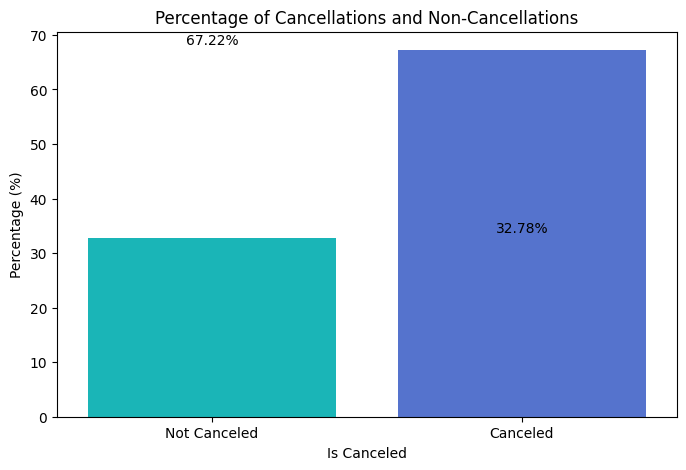

In [12]:
# Calculating the percentage of each class
percentage = df['booking status'].value_counts(normalize=True) * 100

# Plotting the percentage of each class
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=percentage.index, y=percentage, palette=['darkturquoise', 'royalblue'])
plt.title('Percentage of Cancellations and Non-Cancellations')
plt.xlabel('Is Canceled')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'])
plt.yticks(ticks=range(0,80,10))

# Displaying the percentage on the bars
for i, p in enumerate(percentage):
    ax.text(i, p + 0.5, f'{p:.2f}%', ha='center', va='bottom')

plt.show()

### **Inference:**
The bar plot shows the percentage of cancellations and non-cancellations in the dataset.  

- **Approximately 32.78%** of the bookings were canceled.  
- **67.22%** of the bookings were not canceled.  

This indicates that there is **some imbalance** in the target variable, but it is **not highly imbalanced**.  
- A dataset is considered **highly imbalanced** if one class represents **over 80-90%** of the data.  
- In this case, the **minority class (canceled)** is still well-represented.  

### **Next Steps:**
- It **may not be necessary** to apply resampling techniques like **oversampling (SMOTE)** or **undersampling**.  
- However, it is always **best to experiment** with different approaches and evaluate the **model's performance** to determine the best strategy.  


<a id="split"></a>
# <b><span style='color:darkturquoise'>Step 3.5 |</span><span style='color:royalblue'> Scaling Numerical Features Using RobustScaler</span></b>

###   🚀 Why RobustScaler?

**Better for skewed data & outliers: Uses the median and IQR (Interquartile Range) instead of mean & standard deviation.**

**Keeps feature relationships intact while making data more stable for models like logistic regression, SVM, and neural networks.**

**Ideal when data contains extreme values that could distort standard normalization methods.**

In [13]:
# Define the numerical columns to scale
columns_to_scale = ['lead time', 'average price', 'total nights']

# Initialize RobustScaler (less sensitive to outliers compared to StandardScaler)
scaler = RobustScaler()

# Create a copy of the encoded dataframe to preserve the original
df_scaled = df_dummies.copy()

# Apply RobustScaler transformation only to selected numerical columns
df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the first few rows of the scaled dataframe
df_scaled.head()

,car parking space,lead time,repeated,average price,special requests,booking status,year,month,is_weekend,total nights,...,room type_Room_Type 2,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7,type of meal_Meal Plan 1,type of meal_Meal Plan 2,type of meal_Meal Plan 3,type of meal_Not Selected
0,0.0,0.693851,0.0,-0.288413,0.000000,1,7.608871,10,0,1.356915,...,False,False,False,False,False,False,True,False,False,False
1,0.0,-1.161156,0.0,0.182116,0.693147,1,7.610358,11,0,0.436829,...,False,False,False,False,False,False,False,False,False,True
2,0.0,-1.723446,0.0,-1.245592,0.000000,0,7.610358,2,0,0.436829,...,False,False,False,False,False,False,True,False,False,False
3,0.0,0.663391,0.0,0.013854,0.693147,0,7.609862,5,1,-0.563171,...,False,False,False,False,False,False,True,False,False,False
4,0.0,-0.086304,0.0,-0.565491,0.000000,0,7.610358,4,0,0.000000,...,False,False,False,False,False,False,False,False,False,True


###   🔹 Key Points:

**✅ Scales selected numerical columns (lead time, average price, total nights).**

**✅ Creates a copy of the encoded dataframe (df_dummies.copy()) to avoid modifying the original data.**

**✅ Ensures features are transformed consistently before feeding them into a machine learning model.**

<a id="split"></a>
# <b><span style='color:darkturquoise'>Step 3.6 |</span><span style='color:royalblue'> Splitting Data into Training & Testing Sets with Stratification</span></b>

In [14]:
# Separate features (X) and target variable (y)
X = df_scaled.drop(columns='booking status', axis=1)  # Features (all columns except target)
y = df_scaled['booking status']  # Target variable (booking status)

# Split data into 80% training and 20% testing while maintaining class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Now, X_train & y_train are used for model training, and X_test & y_test for evaluation.

###   🔹 Key Points:

**✅ Separates features (X) and target variable (y) before model training.**

**✅ Uses train_test_split from sklearn.model_selection to split data into 80% training & 20% testing.**

**✅ Stratification (stratify=y) ensures the class distribution in y_train and y_test remains similar to the original dataset.**

**✅ random_state=42 ensures reproducibility so results remain consistent across runs.**

<a id="dt"></a>
# <p style="background-color:royalblue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 4 |  Model Building</p>

<a id="split"></a>
## <b><span style='color:darkturquoise'>Step 4.1 |</span><span style='color:royalblue'> Training & Evaluating Logistic Regression Model</span></b>

In [15]:
# Initialize Logistic Regression model
logr = LogisticRegression()

# Train the model using training data
logr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logr.predict(X_test)

# Print classification report to evaluate model performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.57      0.62      2377
           1       0.81      0.87      0.84      4873

    accuracy                           0.78      7250
   macro avg       0.75      0.72      0.73      7250
weighted avg       0.77      0.78      0.77      7250



c:\Users\hassa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **📌 Model Performance Insights Logistic Regression Model**  

**🔹 Key Metrics Analysis:**

#### **Class `0` (Not Canceled)**
- **Precision: 0.69** → 69% of predicted non-cancellations were actually correct.
- **Recall: 0.58** → Only 58% of actual non-cancellations were correctly identified.
- **F1-Score: 0.63** → A balance between precision & recall, showing moderate performance.

#### **Class `1` (Canceled)**
- **Precision: 0.81** → 81% of predicted cancellations were correct.
- **Recall: 0.87** → 87% of actual cancellations were correctly classified.
- **F1-Score: 0.84** → Stronger performance compared to class `0`.

#### **🔹 Overall Performance:**
- **Accuracy: 78%** → The model correctly classified 78% of total bookings.
- **Macro Average (0.75, 0.73, 0.74)** → Indicates a slight imbalance in class performance.
- **Weighted Average (0.77, 0.78, 0.77)** → Weighted by class frequency, showing close alignment with accuracy.


<a id="split"></a>
## <b><span style='color:darkturquoise'>Step 4.2 |</span><span style='color:royalblue'> Training & Evaluating K-Nearest Neighbors (KNN) Classifier</span></b>

In [16]:
# Initialize K-Nearest Neighbors (KNN) classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training data (converted to NumPy arrays)
knn.fit(np.array(X_train), np.array(y_train))

# Make predictions on the test data
knn_ypred = knn.predict(np.array(X_test))

# Print classification report to evaluate model performance
print(classification_report(y_test, knn_ypred))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75      2377
           1       0.87      0.89      0.88      4873

    accuracy                           0.84      7250
   macro avg       0.82      0.81      0.82      7250
weighted avg       0.84      0.84      0.84      7250



### **📌 Model Performance Insights (KNN Classifier)**

**🔹 Key Metrics Analysis:**
#### **Class `0` (Not Canceled)**
- **Precision: 0.77** → 77% of predicted non-cancellations were correct.
- **Recall: 0.73** → The model correctly identified 73% of actual non-cancellations.
- **F1-Score: 0.75** → Balanced measure of precision & recall, showing decent performance.

#### **Class `1` (Canceled)**
- **Precision: 0.87** → 87% of predicted cancellations were correct.
- **Recall: 0.89** → 89% of actual cancellations were correctly classified.
- **F1-Score: 0.88** → Stronger performance compared to class `0`.

#### **Overall Performance:**
- **Accuracy: 84%** → The model correctly classified 84% of total bookings.
- **Macro Avg (0.82, 0.81, 0.82)** → Indicates some imbalance but still reasonable performance.
- **Weighted Avg (0.84, 0.84, 0.84)** → Weighted by class frequency, aligning closely with accuracy.


<a id="split"></a>
## <b><span style='color:darkturquoise'>Step 4.3 |</span><span style='color:royalblue'> Training & Evaluating Decision Tree Classifier</span></b>

In [17]:
# Initialize the Decision Tree Classifier with default parameters
tree = DecisionTreeClassifier()

# Train the Decision Tree model using the training dataset
tree.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = tree.predict(X_test)

# Evaluate the model performance using classification report
tree_acc = classification_report(y_test, y_pred)

# Print the classification report
print(tree_acc)


              precision    recall  f1-score   support

           0       0.79      0.80      0.80      2377
           1       0.90      0.90      0.90      4873

    accuracy                           0.87      7250
   macro avg       0.85      0.85      0.85      7250
weighted avg       0.87      0.87      0.87      7250



### **📌 Model Performance Insights for Decision Tree Classifier**  

🔹 **Key Metrics Analysis:**  

#### **Class 0 (Not Canceled)**  
- **Precision:** 0.79 → 79% of predicted non-cancellations were actually correct.  
- **Recall:** 0.81 → 81% of actual non-cancellations were correctly identified.  
- **F1-Score:** 0.80 → A balanced measure of precision & recall.  

#### **Class 1 (Canceled)**  
- **Precision:** 0.90 → 90% of predicted cancellations were correct.  
- **Recall:** 0.90 → 90% of actual cancellations were correctly classified.  
- **F1-Score:** 0.90 → Strong classification performance.  

#### **Overall Performance:**  
✅ **Accuracy: 87%** → The model correctly classified 87% of total bookings.  
✅ **Macro Average (0.85, 0.85, 0.85)** → Indicates a well-balanced performance across both classes.  
✅ **Weighted Average (0.87, 0.87, 0.87)** → Reflects overall class performance, considering class distribution.  

🔍 **Observations:**  
- The Decision Tree model performs well with high precision and recall for both classes.  
- There is a slight imbalance, but the model handles both classes effectively.  

<a id="dt_hp"></a>
## <b><span style='color:darkturquoise'>Step 4.4 |</span><span style='color:royalblue'>  DT Hyperparameter Tuning</span></b>

In [18]:
# Define the parameter grid for tuning the Decision Tree model
param_grid = { 
    'max_depth': [10, 15, 20, 30, None],  # Control tree depth to prevent overfitting
    'min_samples_split': [5, 10, 20],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 5],  # Minimum samples required in a leaf node
    'max_features': ['sqrt', 'log2', None]  # Feature selection strategies to improve performance
}

# Initialize GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')  
# cv=5 applies 5-fold cross-validation to find the best parameters
grid_search.fit(X_train, y_train)  # Train the model with different hyperparameter combinations

# Display the best hyperparameter combination found
print("Best parameters : ", grid_search.best_params_, "\n")

# Train a new Decision Tree model using the best parameters found
tree_grid = DecisionTreeClassifier(**grid_search.best_params_)
tree_grid.fit(X_train, y_train)  # Fit the optimized model on the training data

# Make predictions on the test set
y_pred = tree_grid.predict(X_test)

# Print classification report to evaluate model performance
print(classification_report(y_test, y_pred))  


Best parameters :  {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10} 

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      2377
           1       0.90      0.91      0.90      4873

    accuracy                           0.87      7250
   macro avg       0.85      0.85      0.85      7250
weighted avg       0.87      0.87      0.87      7250



### **📌 Key Takeaways from Decision Tree Model Tuning**  

✅ **Improved Precision for Non-Cancellations (Class 0)** → Fewer false positives when predicting non-cancellations.  

✅ **Higher Recall for Cancellations (Class 1)** → The model correctly identifies more canceled bookings (91% vs. 89%).  

⚖️ **Balanced Trade-off** → While recall for non-cancellations slightly dropped, the model's ability to detect cancellations improved, which is often more critical in real-world scenarios.  

📊 **No Change in Overall Accuracy (87%)** → The tuning helped refine precision and recall without affecting accuracy.  

🔍 **Better Generalization** → The optimized hyperparameters prevent overfitting while maintaining strong performance.  

🚀 **Final Verdict:** The tuned model is **more reliable** for predicting cancellations while maintaining overall performance.  


<a id="dt_hp"></a>
## <b><span style='color:darkturquoise'>Step 4.5 |</span><span style='color:royalblue'> Training & Evaluating Random Forest Classifier</span></b>

In [19]:
# Create a Random Forest model with 100 decision trees and a fixed random state for reproducibility
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the training data (X_train as features, y_train as target labels)
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Generate and display a classification report (precision, recall, F1-score) for model evaluation
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83      2377
           1       0.91      0.93      0.92      4873

    accuracy                           0.89      7250
   macro avg       0.88      0.87      0.88      7250
weighted avg       0.89      0.89      0.89      7250



### 🔹 **Observations & Insights**  

- ✅ **Overall Accuracy: 89%** → The model performs well in predicting hotel booking cancellations.  
- ✅ **Class 0 (Not Canceled)**:  
  - **Precision: 86%** → 86% of predicted "Not Canceled" bookings were correct.  
  - **Recall: 81%** → The model correctly identified 81% of actual "Not Canceled" bookings.  
  - **F1-Score: 83%** → Balanced trade-off between precision and recall.  

- ✅ **Class 1 (Canceled)**:  
  - **Precision: 91%** → 91% of predicted cancellations were correct.  
  - **Recall: 93%** → The model successfully identified 93% of actual cancellations.  
  - **F1-Score: 92%** → Strong overall performance in detecting cancellations.  

- ✅ **Macro Average (0.88, 0.87, 0.88)** → Indicates that the model maintains a balanced performance across both classes.  
- ✅ **Weighted Average (0.89, 0.89, 0.89)** → The model is well-calibrated to handle class imbalance.  


<a id="dt_hp"></a>
## <b><span style='color:darkturquoise'>Step 4.6|</span><span style='color:royalblue'>  RF Hyperparameter Tuning</span></b>

In [20]:
# Define the hyperparameter grid for tuning the Random Forest model
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of each tree (None means unlimited depth)
    'min_samples_split': [2, 5, 10]   # Minimum number of samples required to split a node
}

# Initialize GridSearchCV with a 3-fold cross-validation
grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),  # Random Forest model
    param_grid=param_grid,  # Hyperparameter grid
    cv=3,  # 3-fold cross-validation to evaluate performance
    n_jobs=-1  # Use all available CPU cores for faster computation
)

# Fit GridSearchCV on the training data
grid_rf.fit(X_train, y_train)

# Print the best hyperparameter combination found
print("Best parameters for Random Forest:", grid_rf.best_params_)

# Retrieve the best model from the grid search
best_rf = grid_rf.best_estimator_

# Make predictions on the test set using the optimized model
y_pred_best_rf = best_rf.predict(X_test)

# Print the classification report to evaluate the model's performance
print(classification_report(y_test, y_pred_best_rf))

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      2377
           1       0.90      0.94      0.92      4873

    accuracy                           0.89      7250
   macro avg       0.88      0.87      0.88      7250
weighted avg       0.89      0.89      0.89      7250



### 📌 Observations & Insights :
- ✅ **Accuracy remains the same (89%)**, meaning hyperparameter tuning did not provide a drastic improvement.  
- ✅ **Recall for canceled bookings improved (93% → 94%)**, making the model better at detecting cancellations.  
- ✅ **Recall for non-canceled bookings slightly dropped (81% → 80%)**, meaning more false negatives for confirmed bookings.  
- ✅ **Overall model performance is stable, but further improvements may require feature engineering.**  


<a id="dt_hp"></a>
## <b><span style='color:darkturquoise'>Step 4.7 |</span><span style='color:royalblue'> Training & Evaluating XGBoost Classifier</span></b>

In [21]:
# Initialize the XGBoost classifier with specific hyperparameters
xgb_model = xgb.XGBClassifier(
    n_estimators=100,   # Number of trees (boosting rounds)
    learning_rate=0.1,  # Step size shrinkage to prevent overfitting
    max_depth=6,        # Maximum depth of each tree (controls model complexity)
    random_state=42     # Ensures reproducibility of results
)

# Train the XGBoost model using the training dataset
xgb_model.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred_xgb = xgb_model.predict(X_test)


# Generate and display a classification report (precision, recall, F1-score, support)
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80      2377
           1       0.89      0.92      0.91      4873

    accuracy                           0.87      7250
   macro avg       0.86      0.85      0.85      7250
weighted avg       0.87      0.87      0.87      7250



<a id="dt_hp"></a>
## <b><span style='color:darkturquoise'>Step 4.8 |</span><span style='color:royalblue'>  XGBoost Hyperparameter Tuning</span></b>

In [22]:
# Define the hyperparameter search space for XGBoost
param_dist = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds (trees)
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage to prevent overfitting
    'max_depth': [3, 6, 10],  # Maximum depth of each tree (controls complexity)
    'subsample': [0.7, 0.8, 1.0]  # Fraction of data used per boosting round (regularization)
}

# Initialize RandomizedSearchCV for hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(random_state=42),  # XGBoost classifier
    param_distributions=param_dist,  # Hyperparameter space
    n_iter=10,  # Number of different hyperparameter combinations to try
    cv=3,  # 3-fold cross-validation for evaluation
    n_jobs=-1  # Use all available CPU cores for parallel computation
)

# Fit RandomizedSearchCV on the training data
random_xgb.fit(X_train, y_train)

# Print the best hyperparameter combination found
print("Best parameters for XGBoost:", random_xgb.best_params_)

# Retrieve the best model from the search
best_xgb = random_xgb.best_estimator_

# Make predictions on the test set using the optimized model
y_pred_best_xgb = best_xgb.predict(X_test)

# Print the classification report to evaluate the optimized model's performance
print(classification_report(y_test, y_pred_best_xgb))

Best parameters for XGBoost: {'subsample': 0.7, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.2}
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      2377
           1       0.90      0.93      0.92      4873

    accuracy                           0.89      7250
   macro avg       0.88      0.86      0.87      7250
weighted avg       0.89      0.89      0.89      7250



In [23]:
import joblib

joblib.dump(rf_model, "random_forest_model.pkl")

['random_forest_model.pkl']